<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/HateSpeech_Detection_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df_copy = df.copy()

# Data Cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],axis=1)

In [6]:
df.shape

(24783, 2)

In [7]:
df.isna().sum()

,0
class,0
tweet,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['tweet'].sample(10)

,tweet
1521,&#8220;@ShianneAlvarez: @187XO_ maybe cuz your...
24148,like a slow death &#8220;@iSell_Pussy4EBT How ...
14213,RT @ArcticFox2016: 150 Christians MASSACRED By...
9554,Gotchya bitch
19620,RT @madisonbeck143: bitch you guessed it!
20203,"RT @tokmetzis: Dreigdwergen, haatsmurfen en de..."
10095,I can guarantee that 9 out of 10 of y'all's bi...
21662,Then I hit that bitch like a free throw !
16188,RT @LiFEOf_AYUNgIN: That pussy is never yours ...
18862,RT @davidcomanhidy: It is well known that @cen...


In [11]:
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]',' ',regex=True)
df['processed_tweet']

,processed_tweet
0,RT mayasolovely As a woman you shouldn t...
1,RT mleew boy dats cold tyga dwn ba...
2,RT UrKindOfBrand Dawg RT sbaby...
3,RT C G Anderson viva based she lo...
4,RT ShenikaRoberts The shit you...
...,...
24778,you s a muthaf in lie LifeAsKing ...
24779,you ve gone and broke the wrong heart baby an...
24780,young buck wanna eat dat nigguh like I ain...
24781,youu got wild bitches tellin you lies


In [12]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [13]:
df['processed_tweet2'] = df['processed_tweet'].str.replace(r'[\s]+',' ',regex=True)
df['processed_tweet2']

,processed_tweet2
0,RT mayasolovely As a woman you shouldn t comp...
1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,RT C G Anderson viva based she look like a tr...
4,RT ShenikaRoberts The shit you hear about me ...
...,...
24778,you s a muthaf in lie LifeAsKing Pearls corey ...
24779,you ve gone and broke the wrong heart baby and...
24780,young buck wanna eat dat nigguh like I aint fu...
24781,youu got wild bitches tellin you lies


In [14]:
df.drop(['tweet','processed_tweet'],axis=1,inplace=True)

In [15]:
df.head()

,class,processed_tweet2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


# NLP

In [16]:
import spacy

In [17]:
nlp = spacy.load('en_core_web_sm')

In [18]:
#lemmetization
def lemmetization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [19]:
df['lemma_tweet'] = df['processed_tweet2'].apply(lemmetization)

In [20]:
#Stopword removal
def stopword_removal(text):
  doc = nlp(text)
  no_stop_words = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stop_words)


In [21]:
df['final_tweet'] = df['lemma_tweet'].apply(stopword_removal)

In [23]:
from tensorflow.keras.preprocessing.text import one_hot

In [24]:
vocab_size = 10000
one_hot_representation = [one_hot(words,vocab_size) for words in df['final_tweet']]

In [25]:
df['final_tweet'][0]

'   RT mayasolovely woman shouldn t complain clean house amp man trash'

In [27]:
one_hot_representation[100]

[331,
 2371,
 6552,
 526,
 2298,
 2660,
 9996,
 3868,
 6638,
 7252,
 4002,
 6811,
 5597,
 3488,
 5017,
 8035,
 2149]

In [29]:
#Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)

In [32]:
df['class'].value_counts()#Imbalanced dataset

,count
class,
1,19190
2,4163
0,1430


To handle imbalanced dataset,we perform smote

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
X = np.array(embedded_tweet)
y = np.array(df['class'])

In [35]:
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X,y)

In [37]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape,X_test.shape

((34034, 20), (8509, 20))

# Building a LSTM model

In [41]:
#Creating a stacked LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout

In [42]:
dimension = 50
model = Sequential([
    keras.layers.Embedding(vocab_size,dimension,input_length=sentence_length),
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.LSTM(50,return_sequences=False),
    keras.layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(X_train,y_train,epochs=10,batch_size = 32,validation_data=(X_test,y_test))

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7876 - loss: 0.5020 - val_accuracy: 0.9208 - val_loss: 0.2384
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9424 - loss: 0.1747 - val_accuracy: 0.9181 - val_loss: 0.2416
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9625 - loss: 0.1213 - val_accuracy: 0.9108 - val_loss: 0.3049
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9707 - loss: 0.0957 - val_accuracy: 0.9109 - val_loss: 0.3265
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9774 - loss: 0.0701 - val_accuracy: 0.9030 - val_loss: 0.4189
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9010 - val_loss: 0.4066
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9887 - loss: 0.0370 - val_accuracy: 0.8909 - val_loss: 0.4801
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9923 - 

In [45]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8983 - loss: 0.5558
Test accuracy: 89.52%


In [51]:
y_pred = np.argmax(model.predict(X_test),axis=-1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Evaluation of Model

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3812
           1       0.91      0.91      0.91      3807
           2       0.72      0.77      0.75       890

    accuracy                           0.90      8509
   macro avg       0.85      0.86      0.86      8509
weighted avg       0.90      0.90      0.90      8509



<Axes: >

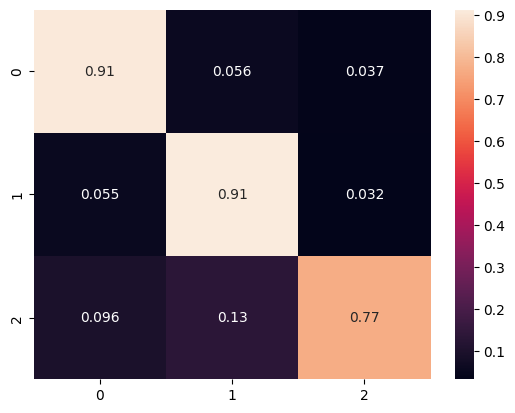

In [54]:
cf = confusion_matrix(y_test,y_pred, normalize='true')
sns.heatmap(cf, annot=True)